In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import metrics

import seaborn as sns

def get_x(df):
    return df.loc[:, df.columns != 'class']
    
def get_y(df):
    return df.loc[:, ['class']].T.values[0]

def get_probs_positive_class(pred):
        positive_probs = []

        for prediction in pred:
            positive_probs.append(prediction[1])
        return positive_probs
    

def load_dataframes(train_path, test_path):
    train_df = pd.read_csv(train_path, index_col=0)
    test_df = pd.read_csv(test_path, index_col=0)
    return train_df, test_df


def cross_testing_accuracy(train_df, test_df, genes_ranking_path, thresholds):
    gdf = pd.read_csv(genes_ranking_path, index_col=0)
    genes = list(gdf.index)
    
    for threshold in thresholds:
        print("Cross-testing with threshold:", threshold)
        #clf = SVC(gamma='auto', probability=True)
        clf = GBC()
        
        tr_top = train_df.loc[:, genes[0:threshold]+['class']]
        ts_top = test_df.loc[:, genes[0:threshold]+['class']]

        X_train = get_x(tr_top)
        y_train = get_y(tr_top)

        clf.fit(X_train, y_train)


        X_test = get_x(ts_top)
        y_test = get_y(ts_top)

        acc_score = clf.score(X_test, y_test)

        pred = clf.predict_proba(X_test)
        y_pred = np.argmax(pred, axis=1)
        pred = get_probs_positive_class(pred)

        roc_auc = metrics.roc_auc_score(np.array(y_test, dtype=int), pred)
        pred_accuracy = metrics.accuracy_score(y_test, y_pred)

        print("Accuracy with .score:", acc_score)
        print("Accuracy with .predict_proba:", pred_accuracy)
        print("ROC AUC:", roc_auc)
        print("Predictions:", y_pred)
        print("\n")

In [2]:
ths = [1, 5, 10, 15, 20, 50, 100]

genes_rank = "/home/colombelli/Documents/experiments/Experiments22_ago/luad/hyb_borda_borda/selection/agg_ranking_th1.csv"
train_df_path = "/home/colombelli/Documents/datasets/assembler/luad/intersect.csv"

test_df1_path = "/home/colombelli/Documents/datasets/cumida/lung/GSE18842/intersect.csv"
test_df2_path = "/home/colombelli/Documents/datasets/cumida/lung/GSE19804/intersect.csv"
test_df3_path = "/home/colombelli/Documents/datasets/cumida/lung/GSE27262/intersect.csv"

In [3]:
tr_df, ts_df = load_dataframes(train_df_path, test_df1_path)
ts_df2, ts_df3 = load_dataframes(test_df2_path, test_df3_path)

In [4]:
import seaborn as sns

In [5]:
tr_df = tr_df.sample(frac=1)
df0 = tr_df.iloc[0:20, 0:-1].T
df0

,TCGA-55-7724-01A-11R-2170-07,TCGA-69-7764-01A-11R-2170-07,TCGA-95-7948-01A-11R-2187-07,TCGA-86-8279-01A-11R-2287-07,TCGA-44-7660-01A-11R-2066-07,TCGA-50-5066-01A-01R-1628-07,TCGA-NJ-A4YP-01A-11R-A262-07,TCGA-L9-A8F4-01A-11R-A39D-07,TCGA-44-6147-01A-11R-1755-07,TCGA-05-4418-01A-01R-1206-07,TCGA-05-4389-01A-01R-1206-07,TCGA-97-A4M5-01A-11R-A24X-07,TCGA-05-5715-01A-01R-1628-07,TCGA-49-6761-01A-31R-1949-07,TCGA-86-8076-01A-31R-2241-07,TCGA-91-6836-11A-01R-1858-07,TCGA-93-A4JN-01A-11R-A24X-07,TCGA-50-5044-01A-21R-1858-07,TCGA-86-8673-01A-11R-2403-07,TCGA-55-8615-01A-11R-2403-07
HOTAIR,0.692661,0.822394,-1.669273,0.512287,0.386799,-1.669273,1.995258,-1.669273,3.022303,0.921325,0.703388,3.325681,5.092897,2.643445,0.035942,-1.669273,-1.669273,0.438933,1.520973,4.049876
C9orf43,1.276238,-4.006018,-2.495143,-3.731891,1.112869,0.159287,2.887718,1.217231,2.289496,-0.533334,3.696600,0.943524,-4.404890,-1.458349,2.372999,-1.980633,-1.010634,1.324021,-4.049876,0.976981
INSC,0.025672,1.135867,-1.559063,-2.624340,-3.662115,1.089977,-0.512287,-0.844249,-0.334852,1.147406,-2.531286,1.520973,2.721650,-3.662115,-0.459845,2.976366,-0.298587,2.531286,-1.824457,-1.995258
CYP11B1,-0.334852,-0.334852,3.142447,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,4.240942,3.271308,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852
TGFA,1.533626,-0.397210,1.421263,-2.390058,-1.689097,-2.240739,-3.271308,0.877167,-0.046213,2.115146,0.210789,-0.844249,2.099866,4.293320,-0.355610,-2.099866,-1.421263,0.866176,-0.735655,-1.252542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASAP2,2.682180,2.866181,-1.702380,-2.495143,2.802955,-0.943524,-1.101410,1.044493,-0.210789,0.575555,0.035942,-0.138708,-1.810656,-4.142028,-1.408979,0.628593,2.909497,1.348116,-3.440043,-4.992955
WDTC1,-3.353539,-0.543872,-1.470791,2.084672,-3.192856,-5.816639,-2.256885,0.005134,0.586138,-2.782319,1.966083,0.543872,-0.910256,2.662723,-0.097581,1.158972,3.069411,0.365999,-0.386799,2.887718
NOTCH2,2.741673,-1.458349,4.464568,0.407629,1.995258,-4.527235,-2.069565,0.376395,1.508364,-3.117771,-2.513141,-1.937204,1.078569,-1.300063,-0.692661,0.746441,-1.508364,-3.244759,-3.192856,0.200482
MPP5,2.513141,-0.449385,-4.527235,-4.593257,-1.182189,-0.988176,0.200482,-0.999394,2.477288,0.179877,0.877167,0.660566,1.372352,-1.838320,0.077030,3.628391,-0.252062,-3.244759,-4.049876,-2.802955


[Text(0.5, 0, '')]

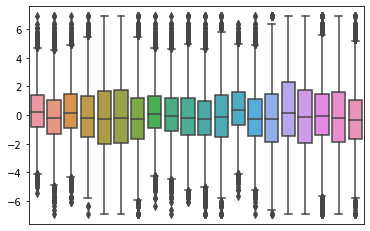

In [26]:
x = sns.boxplot(data=df0)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [6]:
ts_df = ts_df.sample(frac=1)
df1 = ts_df.iloc[0:20, 0:-1].T
df1

,7007,7030,6986,6976,7027,7035,6960,6991,7025,6965,6963,6950,6954,6994,6989,7010,6959,6971,7033,7005
HOTAIR,-0.554655,0.426624,-0.143535,-0.100311,0.129103,-0.967593,-0.143535,-1.565333,-0.924277,-0.245501,-0.334788,0.587943,0.014308,0.656425,-2.092799,1.274802,-1.274802,0.764931,0.882511,-1.012661
C9orf43,-1.337887,1.772836,-1.406334,-0.275030,-0.157994,-0.216169,0.967593,-0.489709,-2.379772,-0.656425,-0.395676,0.554655,0.157994,0.587943,-1.216096,0.100311,0.489709,0.727887,0.304783,0.216169
INSC,1.481498,-0.691747,-0.275030,-0.967593,-0.924277,-0.157994,-2.379772,-0.129103,0.304783,-0.554655,-1.660817,-0.304783,0.157994,0.100311,-1.059719,2.379772,1.059719,-0.842126,0.621846,-0.621846
CYP11B1,-0.587943,0.764931,-1.274802,0.365075,0.882511,0.334788,0.245501,-0.426624,0.426624,-0.129103,-0.621846,1.109059,0.071596,-0.187008,-0.275030,0.802974,-1.660817,0.656425,-0.216169,-0.489709
TGFA,-0.691747,0.924277,-0.842126,-0.395676,-0.216169,-0.365075,0.071596,-1.274802,-0.187008,0.042936,0.727887,-0.521927,0.521927,0.216169,0.621846,0.275030,-2.379772,-0.656425,0.426624,-0.275030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASAP2,-0.042936,0.691747,-0.587943,-0.157994,-0.621846,-0.727887,-2.379772,-0.395676,0.028619,-1.274802,0.656425,-1.216096,-1.337887,-0.014308,0.967593,-0.304783,0.187008,0.727887,-0.457955,0.071596
WDTC1,1.161037,2.379772,-0.489709,1.565333,0.764931,1.910335,-0.727887,-1.481498,0.967593,-0.621846,-0.764931,-0.100311,-0.882511,-1.565333,0.157994,0.691747,-0.842126,-0.129103,1.481498,0.129103
NOTCH2,0.489709,-0.071596,1.565333,1.161037,0.426624,0.521927,-0.042936,-1.910335,0.216169,-0.304783,1.274802,-2.092799,-0.587943,2.379772,-0.365075,-2.379772,-0.521927,-0.457955,0.304783,1.337887
MPP5,0.489709,1.910335,-0.245501,-0.426624,0.691747,1.406334,-0.275030,1.161037,0.014308,0.245501,-1.910335,0.100311,0.924277,0.216169,1.565333,-1.565333,0.071596,-2.092799,0.967593,1.772836


[Text(0.5, 0, '')]

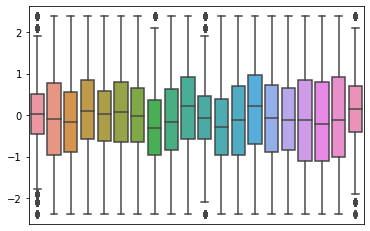

In [27]:
x = sns.boxplot(data=df1)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [30]:
dfConc = pd.concat([df0.T, df1.T]).T

In [31]:
dfConc

,TCGA-62-A46Y-01A-11R-A24H-07,TCGA-86-6562-01A-11R-1755-07,TCGA-97-A4LX-01A-11R-A24X-07,TCGA-44-2665-11A-01R-1758-07,TCGA-38-4628-01A-01R-1206-07,TCGA-78-7150-01A-21R-2039-07,TCGA-05-5715-01A-01R-1628-07,TCGA-55-8301-01A-11R-2287-07,TCGA-05-4384-01A-01R-1755-07,TCGA-J2-8194-01A-11R-2241-07,...,6973,6981,7036,6977,6970,7018,6956,6998,6991,7002
HOTAIR,0.128423,2.273136,-1.669273,-1.669273,2.024741,2.823806,5.092897,1.421263,0.241737,0.714129,...,-0.656425,-0.764931,1.772836,0.395676,0.157994,0.100311,2.092799,0.260239,-1.565333,-0.621846
C9orf43,2.662723,-0.921325,-0.324483,-1.312025,-4.347894,-2.273136,-4.404890,-0.107860,2.701821,-0.035942,...,0.187008,-0.245501,1.406334,0.275030,2.092799,0.014308,0.395676,-0.334788,-0.489709,0.621846
INSC,-3.662115,-1.980633,-0.746441,2.372999,-1.170567,-0.221101,2.721650,1.072874,0.628593,-0.757243,...,2.092799,0.882511,-1.216096,-1.109059,1.660817,-0.457955,-0.042936,-0.426624,-0.129103,0.656425
CYP11B1,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,-0.334852,...,-0.395676,-0.727887,1.012661,1.565333,0.395676,-0.100311,-2.379772,-2.092799,-0.426624,-0.042936
TGFA,0.639237,3.440043,1.264374,-2.208757,2.273136,1.980633,2.099866,0.056484,-0.855203,-0.757243,...,0.587943,-1.216096,0.457955,0.882511,-1.660817,0.187008,1.406334,1.012661,-1.274802,-0.764931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASAP2,-1.662691,-2.662723,-1.495798,0.617961,-3.298276,5.325413,-1.810656,-1.649566,-1.089977,-1.336051,...,1.406334,0.028619,-0.842126,0.304783,-0.924277,0.334788,2.092799,1.481498,-0.395676,-0.334788
WDTC1,0.324483,0.221101,2.549581,3.142447,-0.314120,-4.240942,-0.910256,2.802955,2.161528,-2.009960,...,0.334788,-0.395676,0.882511,0.187008,-0.071596,-2.092799,0.071596,-0.365075,-1.481498,0.042936
NOTCH2,-0.397210,6.909418,0.345228,-0.407629,0.046213,-0.087305,1.078569,0.087305,0.714129,-0.293412,...,0.842126,1.216096,-1.059719,-0.882511,-1.481498,-0.216169,-1.406334,-0.334788,-1.910335,-1.337887
MPP5,-0.714129,3.325681,1.240741,-0.231417,4.992955,-0.283067,1.372352,-1.205521,0.438933,-0.159287,...,-0.691747,1.216096,0.587943,-1.216096,-0.882511,-1.059719,0.426624,0.727887,1.161037,-0.727887


[Text(0.5, 0, '')]

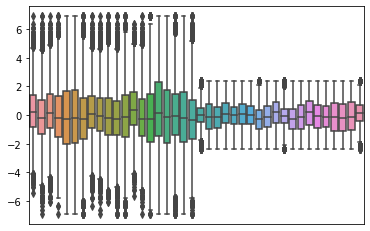

In [32]:
x = sns.boxplot(data=dfConc)
x.set(xticklabels=[])
x.tick_params(bottom=False)
x.set(xlabel=None)

In [7]:
ts_df2 = ts_df2.sample(frac=1)
df2 = ts_df2.iloc[0:20, 0:-1].T

ts_df3 = ts_df3.sample(frac=1)
df3 = ts_df3.iloc[0:20, 0:-1].T

In [12]:
def boxplot_df(df):
    x = sns.boxplot(data=df)
    x.set(xticklabels=[])
    x.tick_params(bottom=False)
    x.set(xlabel=None)
    return

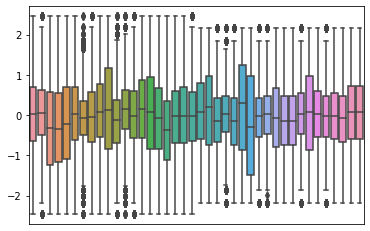

In [13]:
dfConc = pd.concat([df2.T, df3.T]).T
boxplot_df(dfConc)

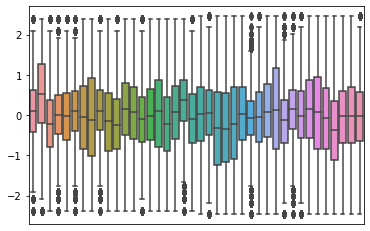

In [14]:
dfConc = pd.concat([df1.T, df2.T]).T
boxplot_df(dfConc)

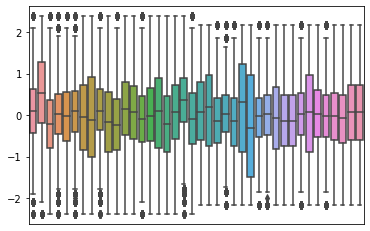

In [15]:
dfConc = pd.concat([df1.T, df3.T]).T
boxplot_df(dfConc)

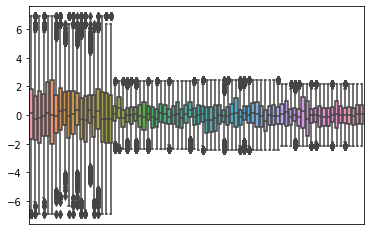

In [16]:
dfConc = pd.concat([df0.T, df1.T, df2.T, df3.T]).T
boxplot_df(dfConc)

In [17]:
ths = [1, 5, 10, 15, 20, 50, 100]

genes_rank = "/home/colombelli/Documents/experiments/Experiments20_ago/hyb_borda_borda/selection/agg_ranking_th1.csv"
train_df_path = "/home/colombelli/Documents/datasets/brca_rnaseq_genes_intersec.csv"

test_df1_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE42568.csv"
test_df2_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE22820.csv"
test_df3_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE70947.csv"

In [18]:
tr_df, ts_df = load_dataframes(train_df_path, test_df1_path)
ts_df2, ts_df3 = load_dataframes(test_df2_path, test_df3_path)

In [29]:
tr_df = tr_df.sample(frac=1)
df0 = tr_df.iloc[0:20, 0:-1].T

ts_df = ts_df.sample(frac=1)
df1 = ts_df.iloc[0:20, 0:-1].T

ts_df2 = ts_df2.sample(frac=1)
df2 = ts_df2.iloc[0:20, 0:-1].T

ts_df3 = ts_df3.sample(frac=1)
df3 = ts_df3.iloc[0:20, 0:-1].T

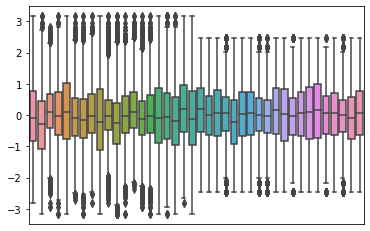

In [30]:
dfConc = pd.concat([df0.T, df1.T]).T
boxplot_df(dfConc)

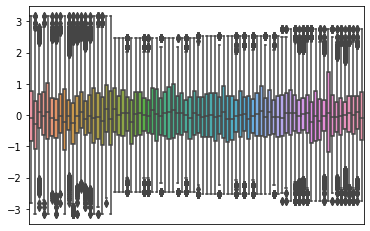

In [31]:
dfConc = pd.concat([df0.T, df1.T, df2.T, df3.T]).T
boxplot_df(dfConc)

In [32]:
df0 = tr_df.iloc[0:10, 0:-1].T
df1 = ts_df.iloc[0:10, 0:-1].T
df2 = ts_df2.iloc[0:10, 0:-1].T
df3 = ts_df3.iloc[0:10, 0:-1].T

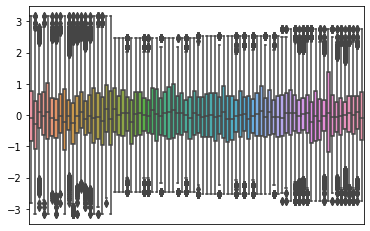

In [33]:
dfConc1 = pd.concat([df0.T, df1.T, df3.T, df3.T]).T
boxplot_df(dfConc)

In [ ]:
train_df_path = "/home/colombelli/Documents/datasets/brca_rnaseq_genes_intersec.csv"

test_df1_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE42568.csv"
test_df2_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE22820.csv"
test_df3_path = "/home/colombelli/Documents/datasets/cumida/intersect_genes/GSE70947.csv"